In [1]:
import numpy as numpy
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [17]:
df['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [18]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [19]:
df['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [21]:
num_features=[feature for feature in df.columns if df[feature].dtype != '0']
cat_features=[feature for feature in df.columns if df[feature].dtype == '0']

In [22]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['avg']=df['total_score']/3

In [23]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


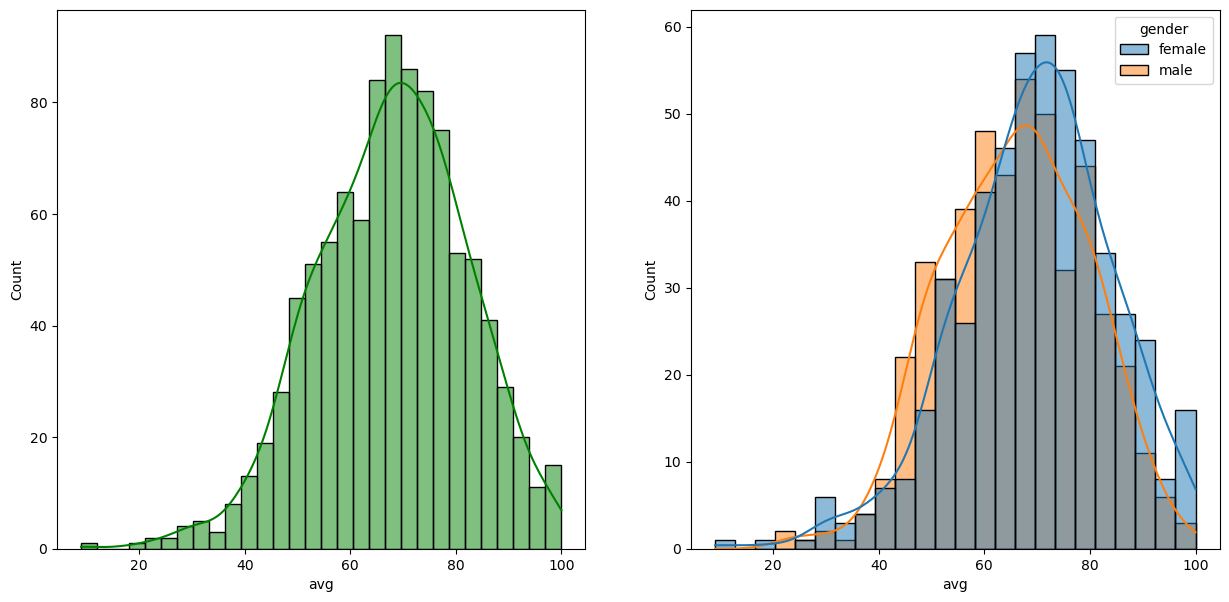

In [25]:
fig,axes = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(df,x='avg',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(df,x='avg',kde=True,hue='gender')
plt.show()

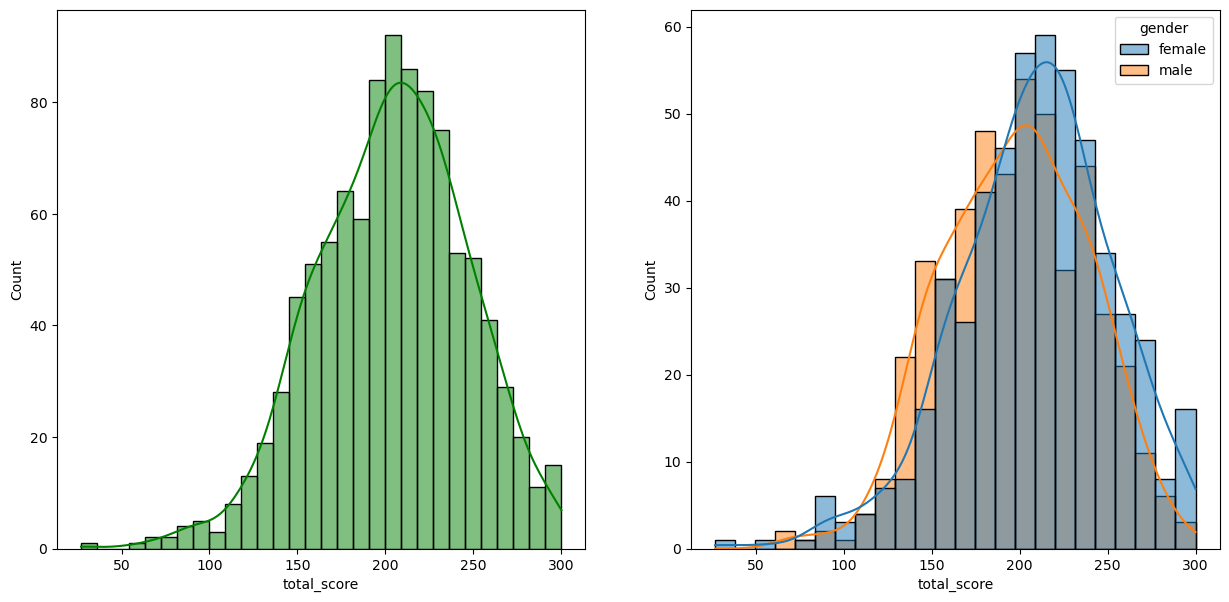

In [26]:
fig,axes = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(df,x='total_score',kde=True,hue='gender')
plt.show()

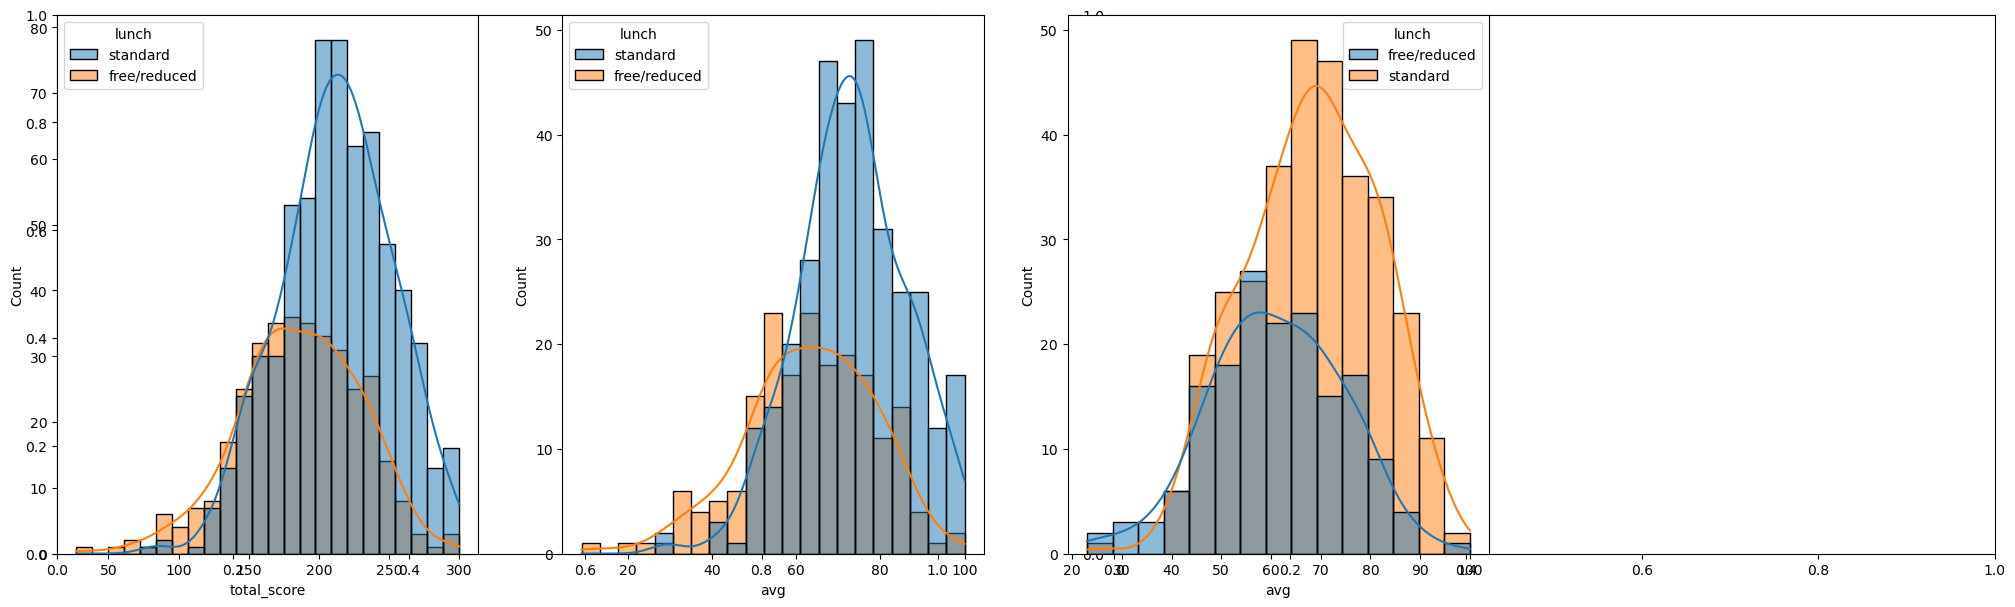

In [30]:
fig,axes = plt.subplots(1,2, figsize=(25,7))
plt.subplot(141)
sns.histplot(df,x='total_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(df[df.gender=='female'],x='avg',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(df[df.gender=='male'],x='avg',kde=True,hue='lunch')

plt.show()